In [37]:
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt
G = 1 # 6.6743 * pow(10,-11)
m = [1,1,1]

In [38]:
def f(m, p, i):
    n=len(p)
    result={'x':0,'y':0,'z':0}
    for j in range(n):
        if j!=i:
            sqrt_norm = pow(p[j]['x']-p[i]['x'],2) + pow(p[j]['y']-p[i]['y'],2) + pow(p[j]['z']-p[i]['z'],2)
            result['x']+=G*m[j]*(p[j]['x']-p[i]['x'])/pow(sqrt_norm,3/2)
            result['y']+=G*m[j]*(p[j]['y']-p[i]['y'])/pow(sqrt_norm,3/2)
            result['z']+=G*m[j]*(p[j]['z']-p[i]['z'])/pow(sqrt_norm,3/2)

    return result

In [39]:
def g(t,x):
    # x = [x1, y1, z1, vx1, vy1, vz1, x2, y2, z2, vx2, vy2, vz2, ..., xn, yn, zn, vxn, vyn, vzn]
    assert len(x)%6 == 0, 'X is not multiple of 6'
    n=len(x)//6
    p=[]
    for i in range(n):
        p.append({'x':x[6*i],'y':x[6*i+1],'z':x[6*i+2]})
    result=[]
    for i in range(n):
        result.append(x[6*i+3]) 
        result.append(x[6*i+4])
        result.append(x[6*i+5])
        aux=f(m, p, i)
        result.append(aux['x'])
        result.append(aux['y'])
        result.append(aux['z'])
    return result     



In [40]:
def improved_euler_method(f,interval,x0,N):
    """
    Solves the initial value problem x'(t) = f(t, x(t)) using the improved Euler method (Heun's method).

    Parameters:
    - f: function of two variables (t, x), returns a NumPy array (vector)
    - intervalo: tuple or list [t0, T] defining the time interval
    - x0: initial condition as a 1D NumPy array
    - N: number of subintervals

    Returns:
    - t: 1D array of time points of shape (N+1,)
    - x: 2D array of solution values, shape (N+1, len(x0))
    """
    x0 = np.asarray(x0).flatten()
    n = len(x0)
    x = np.zeros((N + 1, n))
    x[0] = x0
    h = (interval[1] - interval[0]) / N
    t = np.linspace(interval[0], interval[1], N + 1)

    for i in range(N):
        F1 = np.array(f(t[i], x[i]))
        F2 = np.array(f(t[i + 1], np.array(x[i]) + h * F1))
        x[i + 1] = np.array(x[i]) + h * (F1 + F2)/2

    return t, x, h

In [41]:
def initOrbits():
    return 

#Funciones para crear la animacion de las orbitas
def animateOrbits(t, h, orbits, axis_lim):
    print(t)
    if t==0:
        return

    plt.clf()
    plt.axis([-axis_lim,axis_lim,
          -axis_lim, axis_lim])
    plt.suptitle('Three-body problem')
    plt.title('t= %.2f'%t)
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')     
    plt.xlabel('x')
    plt.ylabel('y')

    n0 = int(t//h)
    
    assert len(orbits[0])%6 == 0, 'orbits is not multiple of 6'
    n=len(orbits[0])//6

    colour=['red','gold','blue','lawngreen','springgreen','cyan',
        'royalblue','navy','olive','darkviolet','magenta','m']
    # orbits = [[x1(0), y1(0), z1(0), vx1(0), vy1(0), vz1(0), x2(0), y2(0), z2(0), vx2(0), vy2(0), vz2(0), ..., xn(0), yn(0), zn(0), vxn(0), vyn(0), vzn(0)],
    #           [x1(1), y1(1), z1(1), vx1(1), vy1(1), vz1(1), x2(1), y2(1), z2(1), vx2(1), vy2(1), vz2(1), ..., xn(1), yn(1), zn(1), vxn(1), vyn(1), vzn(1)],
    #           ...]
    
    for i in range(n):
        for j in range(i+1,n):
            plt.plot([orbits[n0][6*i],orbits[n0][6*j]], [orbits[n0][6*i+1],orbits[n0][6*j+1]], linestyle='--', color='black',linewidth=0.5)

    for i in range(n):
        Fx_total=0
        Fy_total=0
        for j in range(n):
            if i!=j:
                Fx=(orbits[n0][6*j]-orbits[n0][6*i])
                Fy=(orbits[n0][6*j+1]-orbits[n0][6*i+1])
                sqrt_norm = pow(pow(Fx,2) + pow(Fy,2),3/2)
                plt.arrow(orbits[n0][6*i], orbits[n0][6*i+1], Fx/(5*sqrt_norm), Fy/(5*sqrt_norm), head_width=0.05, head_length=0.1, fc=colour[j%len(colour)], ec=colour[j%len(colour)])
                Fx_total+=Fx/(5*sqrt_norm)
                Fy_total+=Fy/(5*sqrt_norm)
        plt.arrow(orbits[n0][6*i], orbits[n0][6*i+1], Fx_total, Fy_total, head_width=0.05, head_length=0.1, fc=colour[i%len(colour)], ec=colour[i%len(colour)])

    for i in range(n):
        plt.plot(orbits[max(0,n0-200):n0+1,6*i],orbits[max(0,n0-200):n0+1,6*i+1], c=colour[i%len(colour)])
    for i in range(n):
        plt.scatter(orbits[n0][6*i],orbits[n0][6*i+1],c=colour[i%len(colour)])
        sqrt_norm = pow(pow(orbits[n0][6*i+3],2) + pow(orbits[n0][6*i+4],2),1/2)
        plt.arrow(orbits[n0][6*i], orbits[n0][6*i+1], orbits[n0][6*i+3]/(5*sqrt_norm), orbits[n0][6*i+4]/(5*sqrt_norm), head_width=0.05, head_length=0.1, fc=colour[i%len(colour)], ec=colour[i%len(colour)])


0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35000000000000003
0.4
0.45
0.5
0.55
0.6
0.65
0.7000000000000001
0.75
0.8
0.85
0.9
0.9500000000000001
1.0
1.05
1.1
1.1500000000000001
1.2
1.25
1.3
1.35
1.4000000000000001
1.45
1.5
1.55
1.6
1.6500000000000001
1.7
1.75
1.8
1.85
1.9000000000000001
1.95
2.0
2.05
2.1
2.15
2.2
2.25
2.3000000000000003
2.35
2.4
2.45
2.5
2.5500000000000003
2.6
2.65
2.7
2.75
2.8000000000000003
2.85
2.9
2.95
3.0
3.0500000000000003
3.1
3.15
3.2
3.25
3.3000000000000003
3.35
3.4
3.45
3.5
3.5500000000000003
3.6
3.65
3.7
3.75
3.8000000000000003
3.85
3.9
3.95
4.0
4.05
4.1
4.15
4.2
4.25
4.3
4.3500000000000005
4.4
4.45
4.5
4.55
4.6000000000000005
4.65
4.7
4.75
4.8
4.8500000000000005
4.9
4.95
5.0
5.05
5.1000000000000005
5.15
5.2
5.25
5.3
5.3500000000000005
5.4
5.45
5.5
5.55
5.6000000000000005
5.65
5.7
5.75
5.8
5.8500000000000005
5.9
5.95
6.0
6.05
6.1000000000000005
6.15
6.2
6.25
6.3
6.3500000000000005
6.4
6.45
6.5
6.55
6.6000000000000005
6.65
6.7
6.75
6.8
6.8500000000000005
6.9
6.95
7.0
7.0

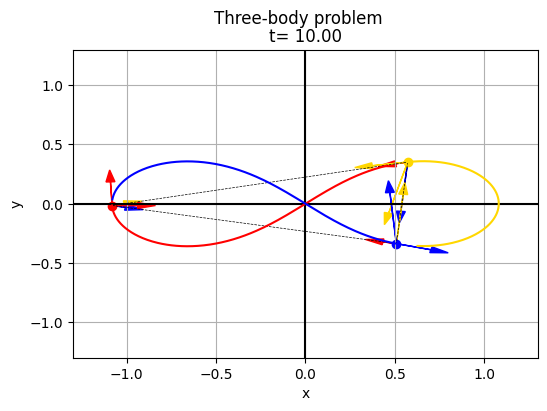

In [42]:
# Figure-eight solution
p1={'x':0.97000436,'y':-0.24308753,'z':0}
p2={'x':-0.97000436,'y':0.24308753,'z':0}
p3={'x':0,'y':0,'z':0}
v1={'x':0.4662036850,'y':0.4323657300,'z':0}
v2={'x':0.4662036850,'y':0.4323657300,'z':0}
v3={'x':-0.93240737,'y':-0.86473146,'z':0}

p = [p1, p2, p3]
v = [v1, v2, v3]

# x0 = x(0) = [x1(0), y1(0), z1(0), vx1(0), vy1(0), vz1(0), x2(0), y2(0), z2(0), vx2(0), vy2(0), vz2(0), ..., xn(0), yn(0), zn(0), vxn(0), vyn(0), vzn(0)]
x0 = []
for i in range(len(p)):
    x0.append(p[i]['x'])
    x0.append(p[i]['y'])
    x0.append(p[i]['z'])
    x0.append(v[i]['x'])
    x0.append(v[i]['y'])
    x0.append(v[i]['z'])

N = 10**3
interval = [0, 10]
t, orbits, h = improved_euler_method(g, interval, x0, N)

figure, ax = plt.subplots(figsize=(6, 4))

ani = animation.FuncAnimation(figure, lambda x: animateOrbits(x, h, orbits, 1.3),
                              t[::5],
                              init_func=initOrbits)

ani.save("Figure-eight solution.gif", writer='pillow', fps=100)

0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35000000000000003
0.4
0.45
0.5
0.55
0.6
0.65
0.7000000000000001
0.75
0.8
0.85
0.9
0.9500000000000001
1.0
1.05
1.1
1.1500000000000001
1.2
1.25
1.3
1.35
1.4000000000000001
1.45
1.5
1.55
1.6
1.6500000000000001
1.7
1.75
1.8
1.85
1.9000000000000001
1.95
2.0
2.05
2.1
2.15
2.2
2.25
2.3000000000000003
2.35
2.4
2.45
2.5
2.5500000000000003
2.6
2.65
2.7
2.75
2.8000000000000003
2.85
2.9
2.95
3.0
3.0500000000000003
3.1
3.15
3.2
3.25
3.3000000000000003
3.35
3.4
3.45
3.5
3.5500000000000003
3.6
3.65
3.7
3.75
3.8000000000000003
3.85
3.9
3.95
4.0
4.05
4.1
4.15
4.2
4.25
4.3
4.3500000000000005
4.4
4.45
4.5
4.55
4.6000000000000005
4.65
4.7
4.75
4.8
4.8500000000000005
4.9
4.95
5.0
5.05
5.1000000000000005
5.15
5.2
5.25
5.3
5.3500000000000005
5.4
5.45
5.5
5.55
5.6000000000000005
5.65
5.7
5.75
5.8
5.8500000000000005
5.9
5.95
6.0
6.05
6.1000000000000005
6.15
6.2
6.25
6.3
6.3500000000000005
6.4
6.45
6.5
6.55
6.6000000000000005
6.65
6.7
6.75
6.8
6.8500000000000005
6.9
6.95
7.0
7.0

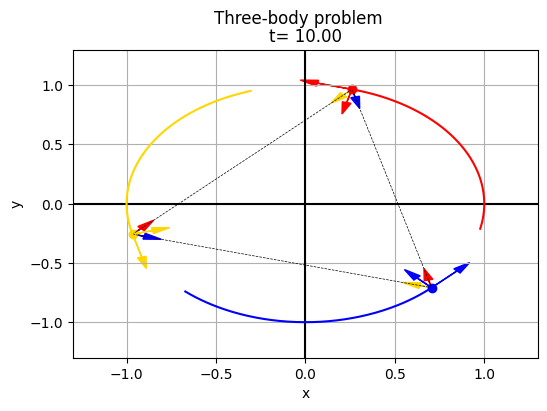

In [43]:
# Circle solution
p1={'x':1.0,'y':0.0,'z':0}
p2={'x':-0.5,'y':np.sqrt(3)/2,'z':0}
p3={'x':-0.5,'y':-np.sqrt(3)/2,'z':0}
v1={'x':0,'y':1*pow(3,-1/4),'z':0}
v2={'x':-np.sqrt(3)*pow(3,-1/4)/2,'y':-pow(3,-1/4)/2,'z':0}
v3={'x':np.sqrt(3)*pow(3,-1/4)/2,'y':-pow(3,-1/4)/2,'z':0}

p = [p1, p2, p3]
v = [v1, v2, v3]

# x0 = x(0) = [x1(0), y1(0), z1(0), vx1(0), vy1(0), vz1(0), x2(0), y2(0), z2(0), vx2(0), vy2(0), vz2(0), ..., xn(0), yn(0), zn(0), vxn(0), vyn(0), vzn(0)]
x0 = []
for i in range(len(p)):
    x0.append(p[i]['x'])
    x0.append(p[i]['y'])
    x0.append(p[i]['z'])
    x0.append(v[i]['x'])
    x0.append(v[i]['y'])
    x0.append(v[i]['z'])

N = 10**3
interval = [0, 10]
t, orbits, h = improved_euler_method(g, interval, x0, N)

figure, ax = plt.subplots(figsize=(6, 4))

ani = animation.FuncAnimation(figure, lambda x: animateOrbits(x, h, orbits, 1.3),
                              t[::5],
                              init_func=initOrbits)

ani.save("Circle solution.gif", writer='pillow', fps=100)

0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35000000000000003
0.4
0.45
0.5
0.55
0.6
0.65
0.7000000000000001
0.75
0.8
0.85
0.9
0.9500000000000001
1.0
1.05
1.1
1.1500000000000001
1.2
1.25
1.3
1.35
1.4000000000000001
1.45
1.5
1.55
1.6
1.6500000000000001
1.7
1.75
1.8
1.85
1.9000000000000001
1.95
2.0
2.05
2.1
2.15
2.2
2.25
2.3000000000000003
2.35
2.4
2.45
2.5
2.5500000000000003
2.6
2.65
2.7
2.75
2.8000000000000003
2.85
2.9
2.95
3.0
3.0500000000000003
3.1
3.15
3.2
3.25
3.3000000000000003
3.35
3.4
3.45
3.5
3.5500000000000003
3.6
3.65
3.7
3.75
3.8000000000000003
3.85
3.9
3.95
4.0
4.05
4.1
4.15
4.2
4.25
4.3
4.3500000000000005
4.4
4.45
4.5
4.55
4.6000000000000005
4.65
4.7
4.75
4.8
4.8500000000000005
4.9
4.95
5.0
5.05
5.1000000000000005
5.15
5.2
5.25
5.3
5.3500000000000005
5.4
5.45
5.5
5.55
5.6000000000000005
5.65
5.7
5.75
5.8
5.8500000000000005
5.9
5.95
6.0
6.05
6.1000000000000005
6.15
6.2
6.25
6.3
6.3500000000000005
6.4
6.45
6.5
6.55
6.6000000000000005
6.65
6.7
6.75
6.8
6.8500000000000005
6.9
6.95
7.0
7.0

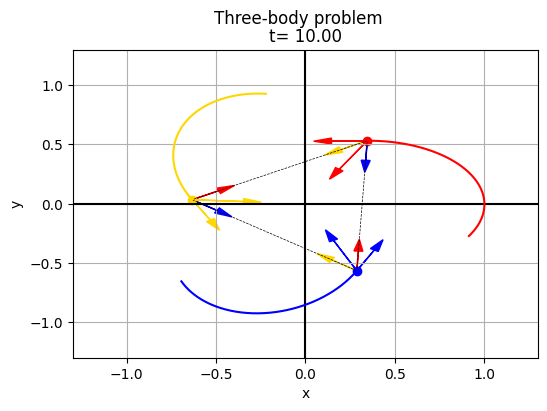

In [44]:
# Elliptical solution
p1={'x':1.0,'y':0.0,'z':0}
p2={'x':-0.5,'y':np.sqrt(3)/2,'z':0}
p3={'x':-0.5,'y':-np.sqrt(3)/2,'z':0}

v_scale = 2/3

v1={'x':0,'y':1*pow(3,-1/4)*v_scale,'z':0}
v2={'x':-v_scale*np.sqrt(3)*pow(3,-1/4)/2,'y':-v_scale*pow(3,-1/4)/2,'z':0}
v3={'x':v_scale*np.sqrt(3)*pow(3,-1/4)/2,'y':-v_scale*pow(3,-1/4)/2,'z':0}

p = [p1, p2, p3]
v = [v1, v2, v3]

# x0 = x(0) = [x1(0), y1(0), z1(0), vx1(0), vy1(0), vz1(0), x2(0), y2(0), z2(0), vx2(0), vy2(0), vz2(0), ..., xn(0), yn(0), zn(0), vxn(0), vyn(0), vzn(0)]
x0 = []
for i in range(len(p)):
    x0.append(p[i]['x'])
    x0.append(p[i]['y'])
    x0.append(p[i]['z'])
    x0.append(v[i]['x'])
    x0.append(v[i]['y'])
    x0.append(v[i]['z'])

N = 10**3
interval = [0, 10]
t, orbits, h = improved_euler_method(g, interval, x0, N)

figure, ax = plt.subplots(figsize=(6, 4))

ani = animation.FuncAnimation(figure, lambda x: animateOrbits(x, h, orbits, 1.3),
                              t[::5],
                              init_func=initOrbits)

ani.save("Elliptical solution.gif", writer='pillow', fps=100)

0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35000000000000003
0.4
0.45
0.5
0.55
0.6
0.65
0.7000000000000001
0.75
0.8
0.85
0.9
0.9500000000000001
1.0


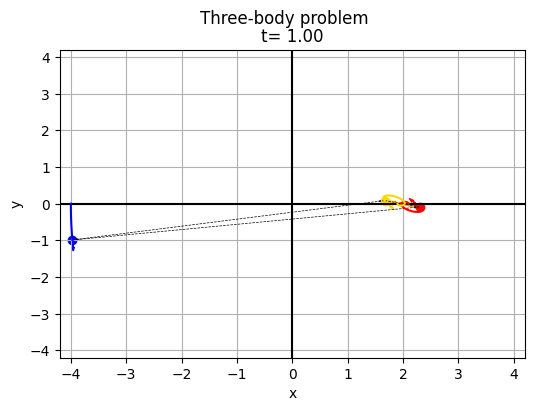

In [69]:
# Chain solution
p1={'x':2.1,'y':0,'z':0}
p2={'x':1.9,'y':0,'z':0}
p3={'x':-4,'y':0,'z':0}

v1={'x':0,'y':1,'z':0}
v2={'x':0,'y':-1,'z':0}
v3={'x':0,'y':-1,'z':0}

p = [p1, p2, p3]
v = [v1, v2, v3]

# x0 = x(0) = [x1(0), y1(0), z1(0), vx1(0), vy1(0), vz1(0), x2(0), y2(0), z2(0), vx2(0), vy2(0), vz2(0), ..., xn(0), yn(0), zn(0), vxn(0), vyn(0), vzn(0)]
x0 = []
for i in range(len(p)):
    x0.append(p[i]['x'])
    x0.append(p[i]['y'])
    x0.append(p[i]['z'])
    x0.append(v[i]['x'])
    x0.append(v[i]['y'])
    x0.append(v[i]['z'])

N = 10**2
interval = [0, 1]
t, orbits, h = improved_euler_method(g, interval, x0, N)

figure, ax = plt.subplots(figsize=(6, 4))

ani = animation.FuncAnimation(figure, lambda x: animateOrbits(x, h, orbits, 4.2),
                              t[::5],
                              init_func=initOrbits)

ani.save("Chain solution.gif", writer='pillow', fps=100)